In [26]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Importing test datasets
test_df = pd.read_csv(r"D:\Datasets for analysis\Loan_Prediction\test_dataset.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [28]:
# Importing train datasets
train_df = pd.read_csv(r"D:\Datasets for analysis\Loan_Prediction\train_dataset.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
#Checking shape of the dataset
train_df.shape

(614, 13)

In [30]:
# Checking non-null columns for further analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
# Checking how credit history affects each applicant
pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'], margins = True)

# Credit history of 1 has most approvals

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

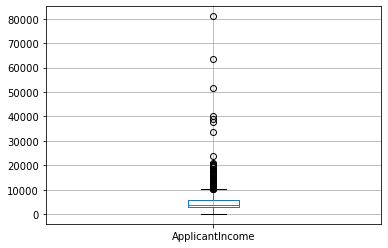

In [33]:
# Checking applicants income slabs for applicants
train_df.boxplot(column = "ApplicantIncome")

# There are many outliers whcih needs to be handled and normalized.

<AxesSubplot:>

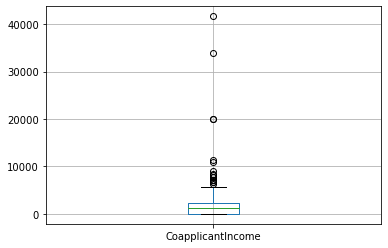

In [34]:
# Checking co applicants income slabs for application
train_df.boxplot(column = "CoapplicantIncome")

# There are many outliers whcih needs to be handled and normalized.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

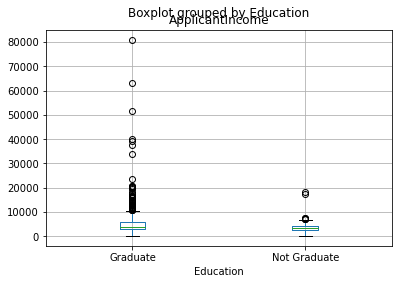

In [35]:
# Checking relation between applicants income and education 
train_df.boxplot(column = "ApplicantIncome", by = "Education")

# There are many outliers whcih needs to be handled and normalized.

<AxesSubplot:>

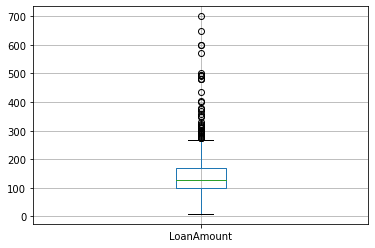

In [36]:
# Checking loan amount variable
train_df.boxplot(column = "LoanAmount")

# There are many outliers whcih needs to be handled and normalized.

<AxesSubplot:>

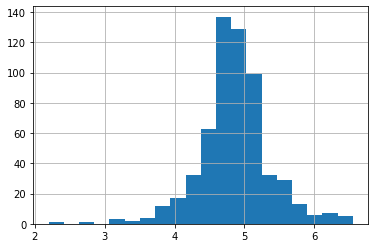

In [39]:
# Normalizing loan amount data
train_df["LoanAmountLog"] = np.log(train_df['LoanAmount'])
train_df["LoanAmountLog"].hist(bins = 20) #Checking data by visualization

In [45]:
# Checking missing value
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmountLog        22
dtype: int64

In [90]:
# Handelling NA's
# Gender, Married, Dependents, self-employeed, Loan_Amount_Term, Credit_History are categorical variable hence using mode to fill NA's
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace = True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace = True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace = True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace = True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace = True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace = True)

# Loan amount is numeric value hence using mean function to replace missing values
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace = True)
train_df['LoanAmountLog'].fillna(train_df['LoanAmountLog'].mean(), inplace = True)

In [91]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmountLog        0
dtype: int64

In [93]:
# Normalizing income slabs
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
train_df['TotalIncomeLog'] = np.log(train_df['TotalIncome'])

<AxesSubplot:>

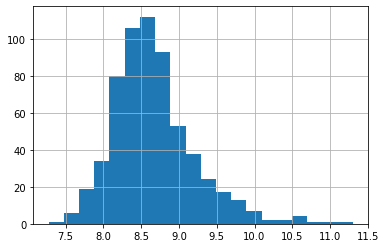

In [94]:
train_df['TotalIncomeLog'].hist(bins = 20)

In [113]:
# all the values with independant variables using index
df1 = train_df.iloc[:, np.r_[1:5, 9:11, 13:15]].values

# all the values with dependant variables using index
df2 = train_df.iloc[:,12].values

In [116]:
df1

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [117]:
df2

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()

In [133]:
#Splitting data in test and train data
df1_train, df1_test, df2_train, df2_test = train_test_split(df1, df2, test_size = .2, random_state = 0)
print(df1_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [134]:
# Transforming train data in numerical form
LabelEncoder_df1 = LabelEncoder()
LabelEncoder_df2 = LabelEncoder()
for i in range(0,5):
    df1_train[:,i] = LabelEncoder_df1.fit_transform(df1_train[:,i])
    df1_train[:,7] = LabelEncoder_df1.fit_transform(df1_train[:,i])
    df2_train = LabelEncoder_df2.fit_transform(df2_train)

In [135]:
df1_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 7],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 7],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 7],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 7],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 7],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 7]], dtype=object)

In [136]:
df2_train


array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [138]:
# Transforming test data in numerical form
for i in range(0,5):
    df1_test[:, i] = LabelEncoder_df1.fit_transform(df1_test[:,i])
    df1_test[:, 7] = LabelEncoder_df1.fit_transform(df1_test[:,7])
    df2_test = LabelEncoder_df2.fit_transform(df2_test)

In [139]:
df1_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [140]:
df2_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [143]:
# for scalling our dataset
df1_train = ss.fit_transformrm(df1_train)
df1_test = ss.fit_transform(df1_test)

In [145]:
#Providing training dataset to algorithm
DTClassifier.fit(df1_train, df2_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [146]:
#Use above algorithm on test dataset
df1_pred = DTClassifier.predict(df1_test)
df1_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [149]:
# checking accuracy of data
print('The accuracy of decision tree is: ', metrics.accuracy_score(df1_pred, df2_test))

The accuracy of decision tree is:  0.6747967479674797


In [152]:
# Using naive bayes algorithm
NBClassifier.fit(df1_train, df2_train)

GaussianNB()

In [153]:
df1_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [159]:
print('The accuracy of Naive Bayes is: ',metrics.accuracy_score(df1_pred, df2_test))

The accuracy of Naive Bayes is:  0.6747967479674797


In [172]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score

In [173]:
# Using logistic regression 
cross_val_score(log_clf, df1_train, df2_train, scoring = make_scorer(accuracy_score), cv = 3)

array([0.81707317, 0.80487805, 0.79141104])

In [174]:
# Validation on logistic regression
df1_predo = log_clf.fit(df1_train, df2_train). predict(df1_test)
accuracy_score(df1_predo, df2_test)

0.8292682926829268

In [175]:
# use imported test csv data
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [178]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [184]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [196]:
# Using mode for categorical values and mean for numerical values 
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace = True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace = True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace = True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace = True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace = True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mode()[0], inplace = True)

<AxesSubplot:>

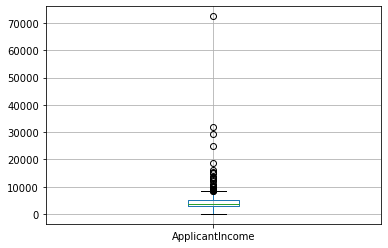

In [185]:
#There are outliers
test_df.boxplot(column = 'ApplicantIncome')

<AxesSubplot:>

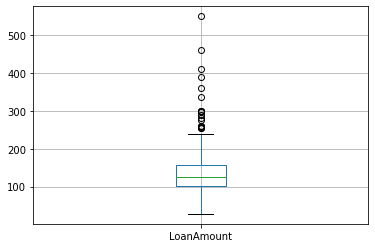

In [186]:
# There are outliers
test_df.boxplot(column = 'LoanAmount')

In [187]:
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

In [188]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [191]:
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'])
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [192]:
test = test_df.iloc[:,np.r_[1:5, 9:11, 13:15]].values

In [193]:
for i in range(0,5):
    test[:,i] = LabelEncoder_df1.fit_transform(test[:,i])
    test[:,7] = LabelEncoder_df1.fit_transform(test[:,7])

In [194]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

Logistic regression performs best on the validation data with an accuracy score of 82.7%.